In [1]:
import tensorflow as tf
from tensorflow import keras


2025-01-19 20:42:55.877591: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 20:42:55.945875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 20:42:55.963197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 20:42:55.968107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 20:42:56.036292: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.__version__

'2.17.0'

In [3]:
keras.__version__

'3.6.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [7]:
#Creatción de un conjunto de validación y normalización de los datos
#Toma los primeros 5000 datos para validación y los demás para entrenamiento, diviendo por 255 para normalizar.

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
#Etiquetas de las clases

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
#Creación del modelo

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/home/fernando/anaconda3/envs/mlpy/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1737337378.374237    1035 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737337378.517924    1035 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737337378.517971    1035 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737337378.521082    1035 cuda_executor.cc:1001] could not open file to rea

In [10]:
#Resumen del modelo

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
model.get_layer(hidden1.name) is hidden1

True

In [14]:
#Pesos y  sesgos
weights, biases = hidden1.get_weights()
weights

array([[ 0.06294753, -0.01156761,  0.03397553, ...,  0.06137328,
         0.0535033 ,  0.01202665],
       [ 0.02649982,  0.07269707,  0.05540329, ..., -0.01541546,
         0.0091894 , -0.04285588],
       [ 0.01002739, -0.03345352,  0.06043865, ..., -0.00209915,
         0.03235684,  0.04082039],
       ...,
       [-0.02185309,  0.0142069 ,  0.01986975, ...,  0.06399466,
        -0.02914054, -0.0105481 ],
       [-0.00305526, -0.01311549,  0.0313838 , ...,  0.03215676,
         0.0474496 , -0.02641945],
       [ 0.00396789, -0.0382682 ,  0.00911354, ..., -0.01719955,
         0.03816891, -0.03335128]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
print(biases)
biases.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(300,)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

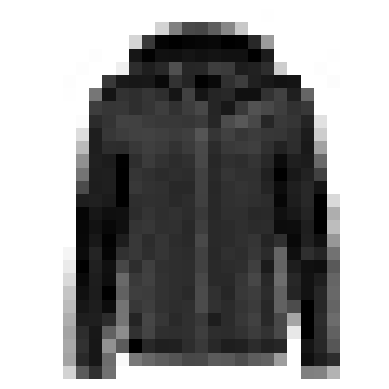

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [19]:
class_names[y_train[0]]

'Coat'

In [20]:
#Entrenamiento del modelo

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


I0000 00:00:1737337381.644076    3287 service.cc:146] XLA service 0x7faaec005760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737337381.644126    3287 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-01-19 20:43:01.671788: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-19 20:43:01.708817: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
2025-01-19 20:43:02.649397: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45', 36 bytes spill stores, 36 bytes spill loads

2025-01-19 20:43:02.713876: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in f

 165/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.3790 - loss: 1.8801

I0000 00:00:1737337383.370418    3287 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1697/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.6700 - loss: 1.0363

2025-01-19 20:43:05.369351: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212', 20 bytes spill stores, 20 bytes spill loads

2025-01-19 20:43:05.598373: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212', 16 bytes spill stores, 16 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6711 - loss: 1.0325 - val_accuracy: 0.8140 - val_loss: 0.5342
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8235 - loss: 0.5110 - val_accuracy: 0.8496 - val_loss: 0.4483
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8408 - loss: 0.4532 - val_accuracy: 0.8564 - val_loss: 0.4177
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8494 - loss: 0.4263 - val_accuracy: 0.8612 - val_loss: 0.3997
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.8591 - loss: 0.4081 - val_accuracy: 0.8658 - val_loss: 0.3945
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8653 - loss: 0.3859 - val_accuracy: 0.8644 - val_loss: 0.3756
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8713 - loss: 0.3730 - val_accuracy: 0.8698 - val_loss: 0.3632
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3583 - val_accur

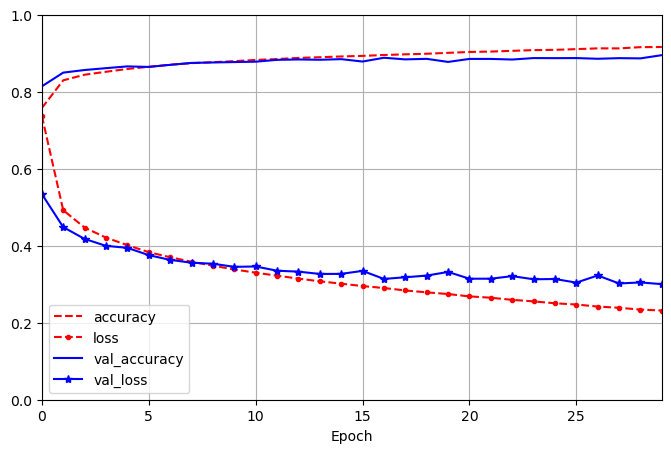

In [21]:
# Graficar la pérdida y la precisión del modelo

import pandas as pd
pd.DataFrame(history.history).plot(
 figsize=(8, 5), xlim=[0, 29], ylim=[0, 1],
grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])
plt.show()


<Axes: >

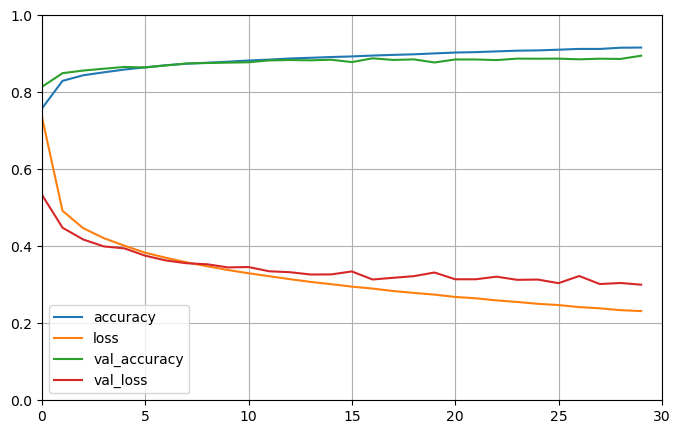

In [22]:
df = pd.DataFrame(history.history)
df.head()
df.plot(figsize=(8, 5), xlim = [0,30], ylim=[0, 1], grid=True)

In [24]:
#Evaluar el modelo
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8325 - loss: 74.3246


[78.4136734008789, 0.8258000016212463]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2025-01-19 21:30:14.473044: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18', 4 bytes spill stores, 4 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [1]:
from pathlib import Path
from time import strftime

In [ ]:
def get_run_logdir(root_logdir):
    return Path(root_logdir) / strftime("run_%Y_%m_%d-%H_%M_%S")